In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio


In [2]:
CAPUCHIN_BIRD='/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Capuchinbird_Clips/XC114131-0.wav'
NOT_CAPUCHIN_BIRD='/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Not_Capuchinbird_Clips/Crickets-chirping-0.wav'

In [3]:
def load_16k_mono(filename):
    file_contents=tf.io.read_file(filename)
    wav,sample_rate=tf.audio.decode_wav(file_contents,desired_channels=1)
    wav=tf.squeeze(wav,axis=-1)
    sample_rate=tf.cast(sample_rate,dtype=tf.int64)
    wav=tfio.audio.resample(wav, rate_in=sample_rate,rate_out=16000)
    return wav

In [4]:
wave=load_16k_mono(CAPUCHIN_BIRD)
nwave=load_16k_mono(NOT_CAPUCHIN_BIRD)

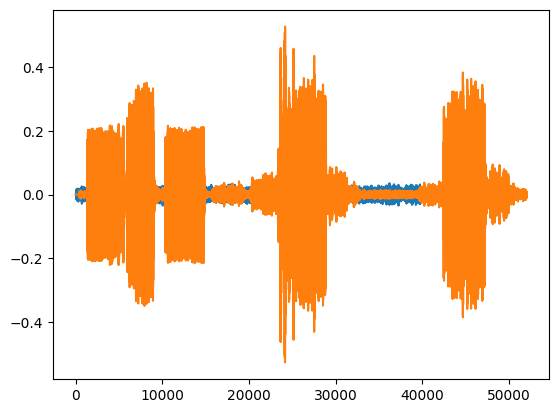

In [5]:
plt.plot(wave)
plt.plot(nwave)
plt.show()

In [6]:
POS='/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Capuchinbird_Clips'
NEG='/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Not_Capuchinbird_Clips'

In [7]:
pos=tf.data.Dataset.list_files(POS+'/*.wav')
neg=tf.data.Dataset.list_files(NEG+'/*.wav')

In [8]:
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
data = positives.concatenate(negatives)

In [9]:
data.as_numpy_iterator().next()

(b'/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Capuchinbird_Clips/XC227468-5.wav',
 1.0)

In [12]:
lenghts=[]
for file in os.listdir('/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Capuchinbird_Clips'):
    tensor_wave = load_16k_mono(os.path.join('/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Capuchinbird_Clips', file))
    lenghts.append(len(tensor_wave))


In [13]:
tf.math.reduce_mean(lenghts)


<tf.Tensor: shape=(), dtype=int32, numpy=54156>

In [14]:
tf.math.reduce_max(lenghts)


<tf.Tensor: shape=(), dtype=int32, numpy=80000>

In [15]:
tf.math.reduce_min(lenghts)

<tf.Tensor: shape=(), dtype=int32, numpy=32000>

In [17]:
def preprocess(file_path, label): 
    wav = load_16k_mono(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

In [19]:
filepath, label = positives.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [20]:
spectrogram, label = preprocess(filepath, label)

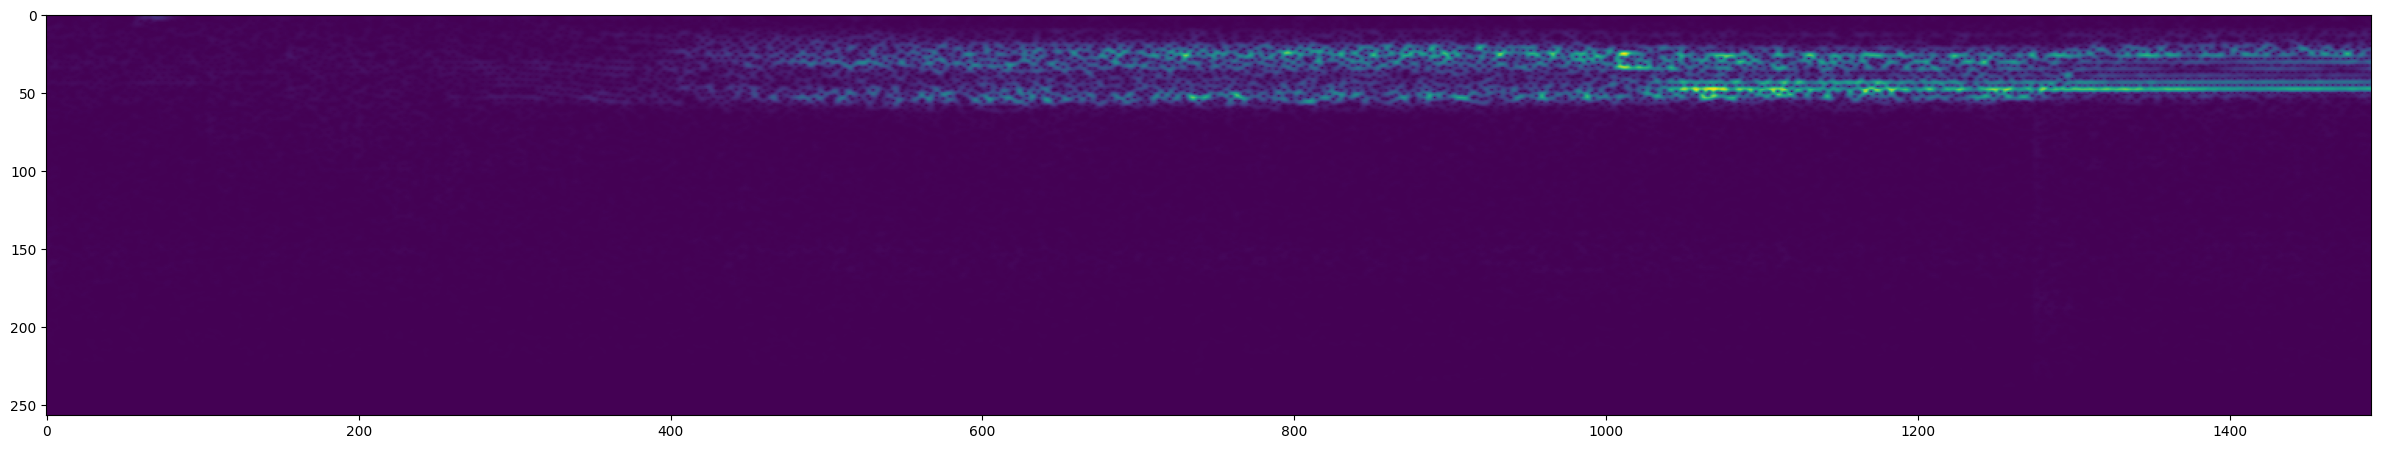

In [21]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()